# Niederschlag from DWD

## Klimadaten

[stundenwerte_RR_05705_hist.zip](https://www.dwd.de/DE/leistungen/_config/leistungsteckbriefPublication.zip?view=nasPublication&nn=16102&imageFilePath=675349470684952943382999480164406894835507349402593906628786280354581421008571928705011438849092751258299962952312473511744392814375916459681379337607540679777573246835730326122056459559982440454207144420355774317891799102452512290249737221071767178890331035105331501334382788925&download=true)

from [Klimadaten Deutschland - Stundenwerte (Archiv)](https://www.dwd.de/DE/leistungen/klimadatendeutschland/klarchivstunden.html) "Würzburg, Niederschlag, Historisch"

## Climate data center

https://cdc.dwd.de/portal/


In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data_OBS_DEU_PT1H_RR_5705.csv',
                 index_col=False,
                 parse_dates=['datetime'],
                 usecols = [2,3],
                 names=['datetime', 'precipitation'],
                 skiprows=1
                )
df = df.set_index('datetime')
df

precipitation
datetime                          
1995-09-01 00:00:00            0.0
1995-09-01 01:00:00            0.2
1995-09-01 02:00:00            0.2
1995-09-01 03:00:00            0.1
1995-09-01 04:00:00            0.0
...                            ...
2023-10-27 04:00:00            0.0
2023-10-27 05:00:00            0.0
2023-10-27 06:00:00            0.0
2023-10-27 07:00:00            0.0
2023-10-27 08:00:00            0.2

[245850 rows x 1 columns]

In [3]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20, 10)

In [4]:
df2 = df[df.precipitation >= 0]

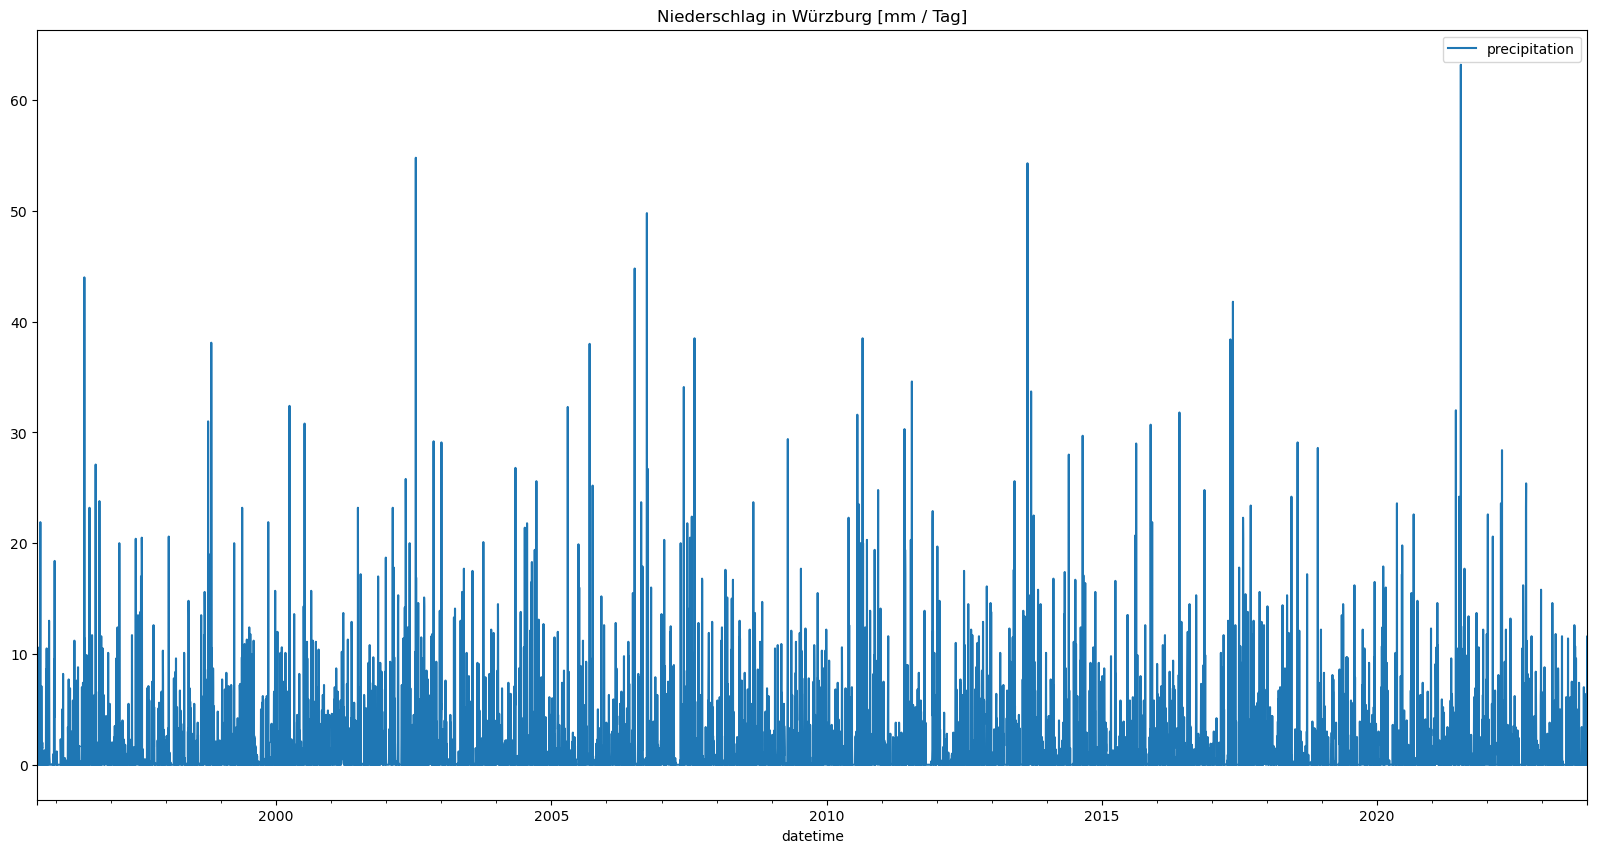

In [5]:
df2.resample('d').sum().plot(title='Niederschlag in Würzburg [mm / Tag]');

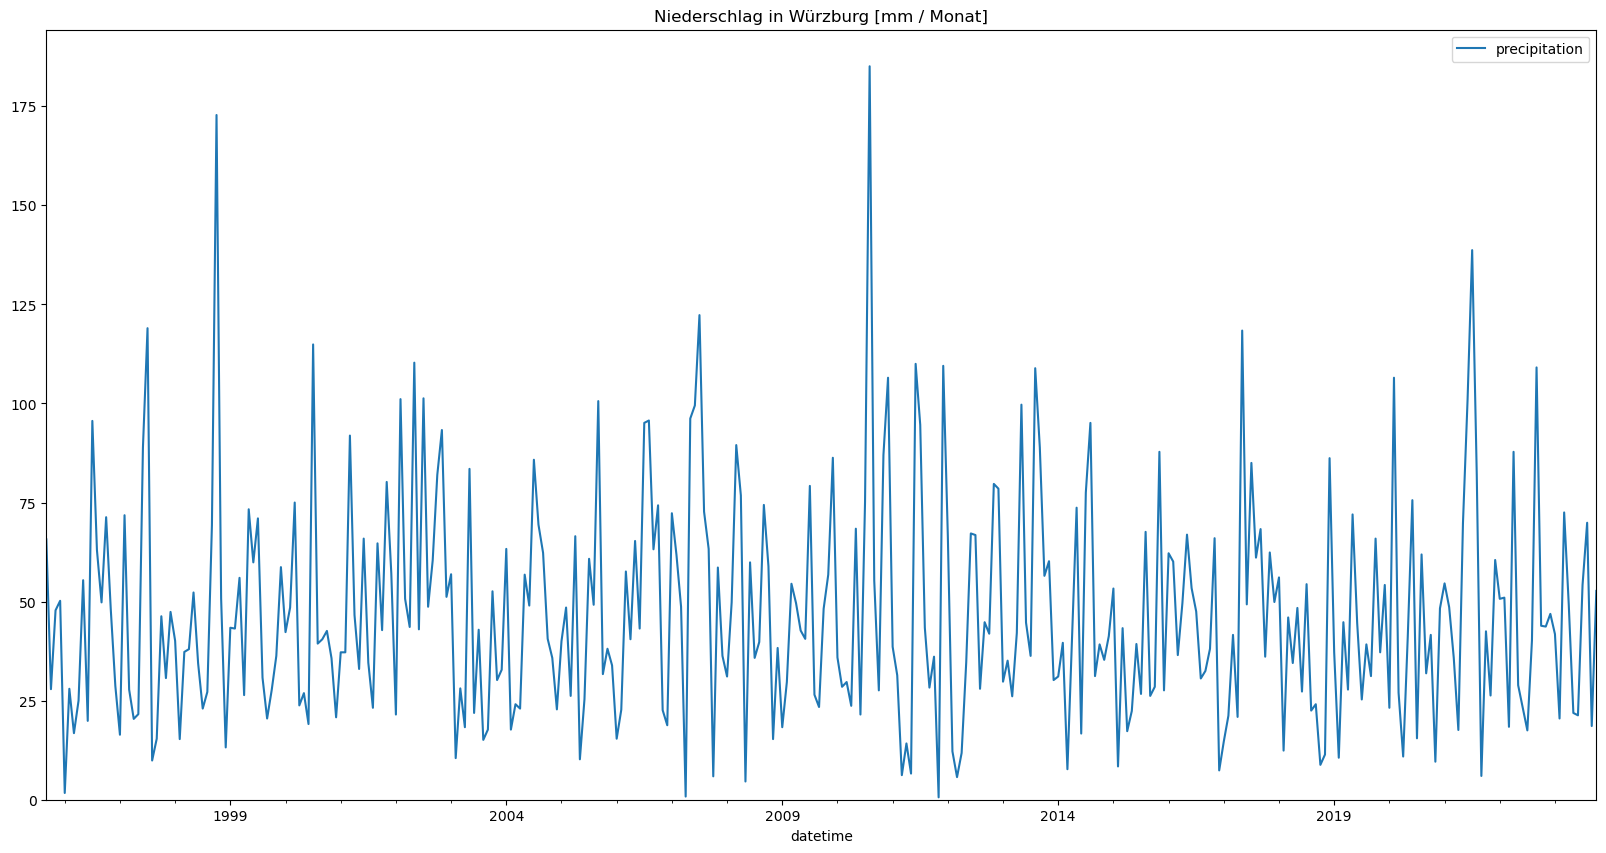

In [6]:
df2.resample('M').sum().plot(title='Niederschlag in Würzburg [mm / Monat]', ylim=(0, None));

In [7]:
yearly_values = df2[df2.index.year >= 1996].resample('Y').sum()

In [8]:
yearly_values.describe()

precipitation
count      28.000000
mean      563.071429
std        96.674589
min       410.500000
25%       512.550000
50%       548.900000
75%       614.400000
max       807.100000

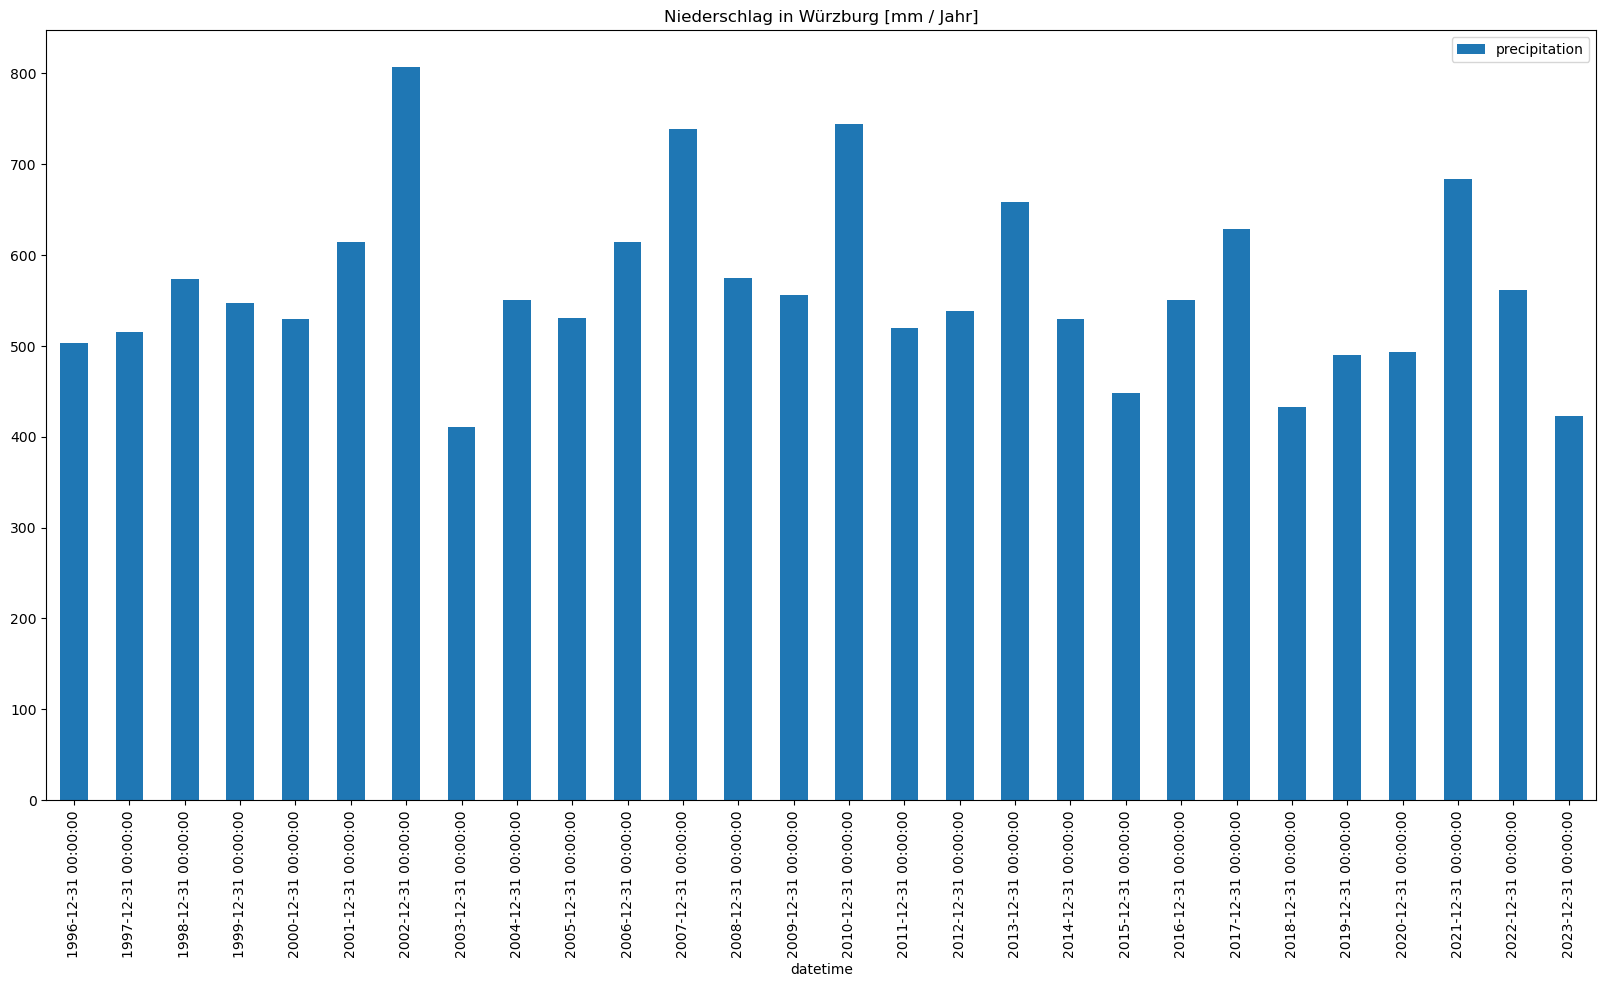

In [9]:
yearly_values.plot.bar(title='Niederschlag in Würzburg [mm / Jahr]', ylim=(0, None));

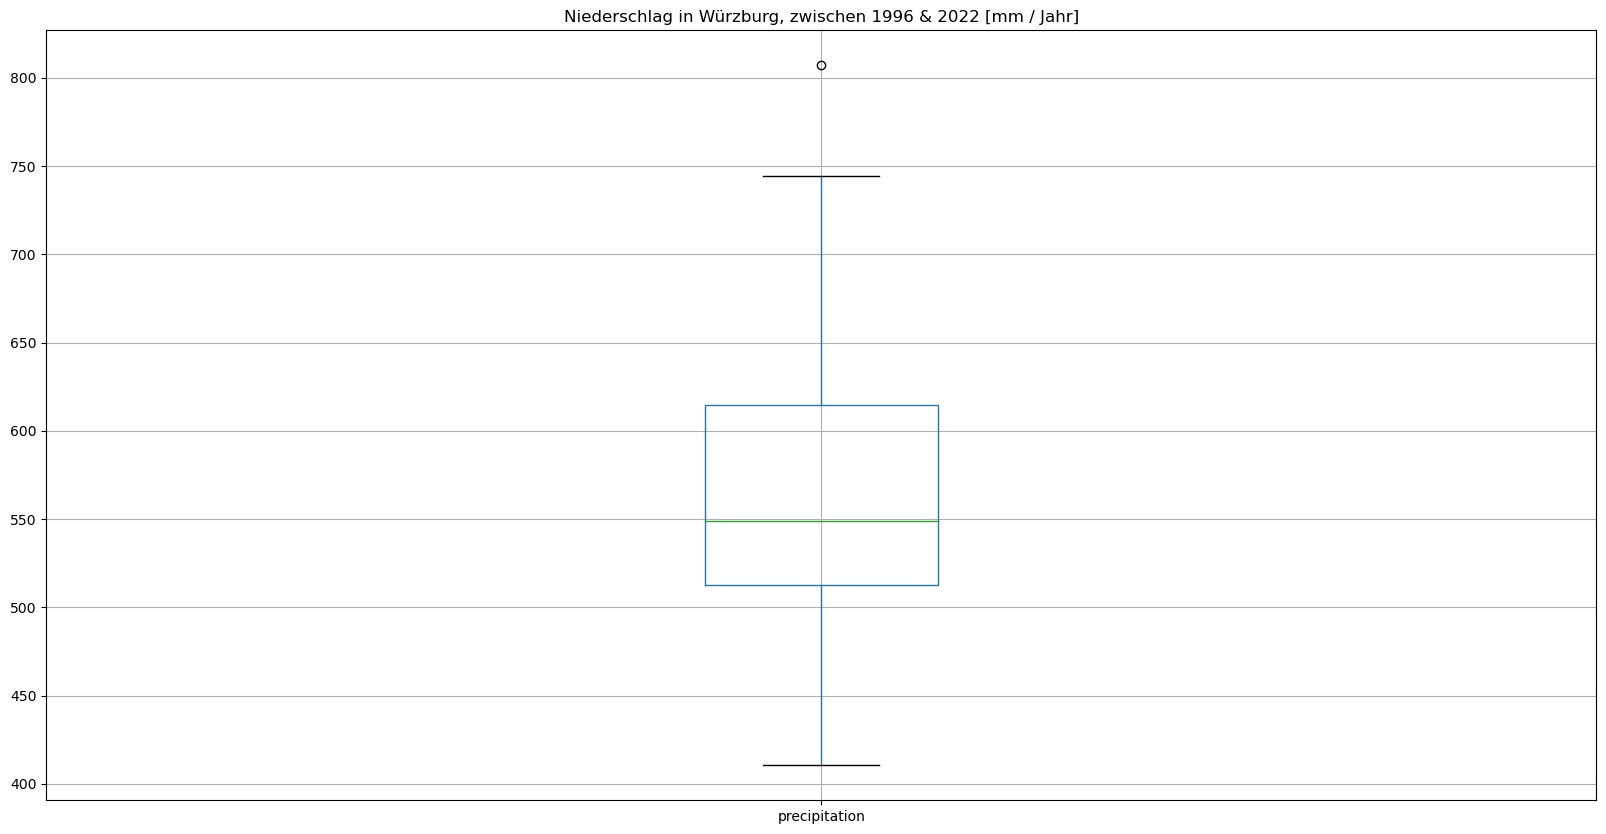

In [10]:
yearly_values.boxplot()
plt.title("Niederschlag in Würzburg, zwischen 1996 & 2022 [mm / Jahr]")
plt.savefig('wurzburg_yearly_precipitations_1996_2022.png', facecolor='w', bbox_inches='tight')

In [11]:
df3 = df2[df2.index.year == 2022]

In [12]:
rain2022 = pd.pivot_table(df3, values='precipitation', index=df3.index.time, columns=df3.index.dayofyear)
rain2022

datetime  1    2    3    4    5    6    7    8    9    10   ...  356  357  \
00:00:00  0.0  0.0  0.0  0.6  0.8  0.0  0.0  0.0  0.0  0.0  ...  0.0  1.2   
01:00:00  0.0  0.0  0.0  1.1  0.4  0.0  0.0  0.0  0.3  0.0  ...  0.0  0.6   
02:00:00  0.0  0.0  2.4  1.1  0.0  0.0  0.0  0.0  0.3  0.0  ...  0.1  0.2   
03:00:00  0.0  0.0  0.1  0.6  0.6  0.0  0.0  0.3  0.4  0.0  ...  0.4  0.3   
04:00:00  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.2  0.8  0.0  ...  0.0  0.2   
05:00:00  0.0  0.0  0.0  1.6  0.0  0.0  0.0  1.0  0.9  0.0  ...  0.0  0.0   
06:00:00  0.0  0.0  0.2  2.5  0.0  0.0  0.0  0.4  0.1  0.0  ...  0.1  0.1   
07:00:00  0.0  0.0  1.2  1.6  0.0  0.0  0.0  0.1  0.2  0.0  ...  1.4  0.0   
08:00:00  0.0  0.0  2.8  1.1  0.0  0.0  0.0  0.0  0.8  0.0  ...  0.3  0.0   
09:00:00  0.0  0.0  0.1  1.2  0.0  0.1  0.0  0.0  0.2  0.0  ...  1.1  0.0   
10:00:00  0.0  0.0  0.1  1.2  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
11:00:00  0.0  0.0  0.9  1.5  0.0  0.0  0.1  0.0  0.1  0.0  ...  0.0  0.0   
12:00:00  0.0  0.0  0.0  3.2  0.0  0.0  0.2  0.0  0.0  0.0  ...  0.1  0.1   
13:00:00  0.0  0.0  0.0  1.9  0.0  0.0  0.1  0.0  0.0  0.0  ...  0.0  0.5   
14:00:00  0.0  0.0  0.0  0.5  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.2  1.5   
15:00:00  0.0  0.0  0.2  0.6  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.4  2.3   
16:00:00  0.0  0.0  0.1  0.8  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.3  2.3   
17:00:00  0.0  0.0  0.0  0.4  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  1.1   
18:00:00  0.0  0.0  0.0  0.1  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.2  1.4   
19:00:00  0.0  0.0  0.5  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.2  1.8   
20:00:00  0.0  0.0  0.1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.6   
21:00:00  0.0  0.0  0.3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.1  1.5   
22:00:00  0.0  0.0  0.1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.7  0.1   
23:00:00  0.0  0.0  0.5  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  1.3  0.0   

datetime  358  359  360  361  362  363  364  365  
00:00:00  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
01:00:00  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
02:00:00  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
03:00:00  0.0  0.0  0.0  0.0  0.0  0.1  0.0  0.0  
04:00:00  0.0  0.0  0.0  0.0  0.0  0.1  0.0  0.0  
05:00:00  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
06:00:00  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
07:00:00  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
08:00:00  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
09:00:00  0.0  0.0  0.4  0.0  0.0  0.0  0.0  0.0  
10:00:00  0.0  0.0  1.1  0.0  0.0  0.0  0.0  0.0  
11:00:00  0.0  0.0  0.6  0.0  0.0  0.0  0.0  0.0  
12:00:00  0.2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
13:00:00  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
14:00:00  0.2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
15:00:00  0.2  0.0  0.1  0.0  0.0  0.0  0.0  0.0  
16:00:00  0.0  0.0  0.0  0.0  0.0  0.7  0.1  0.0  
17:00:00  0.0  0.0  0.0  0.0  0.0  1.4  1.1  0.0  
18:00:00  0.0  0.0  2.2  0.0  0.0  0.0  0.1  0.0  
19:00:00  0.0  0.0  1.0  0.0  0.0  0.0  0.1  0.0  
20:00:00  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
21:00:00  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
22:00:00  0.0  0.0  0.1  0.0  0.0  0.0  0.0  0.0  
23:00:00  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[24 rows x 365 columns]

In [13]:
import seaborn as sns

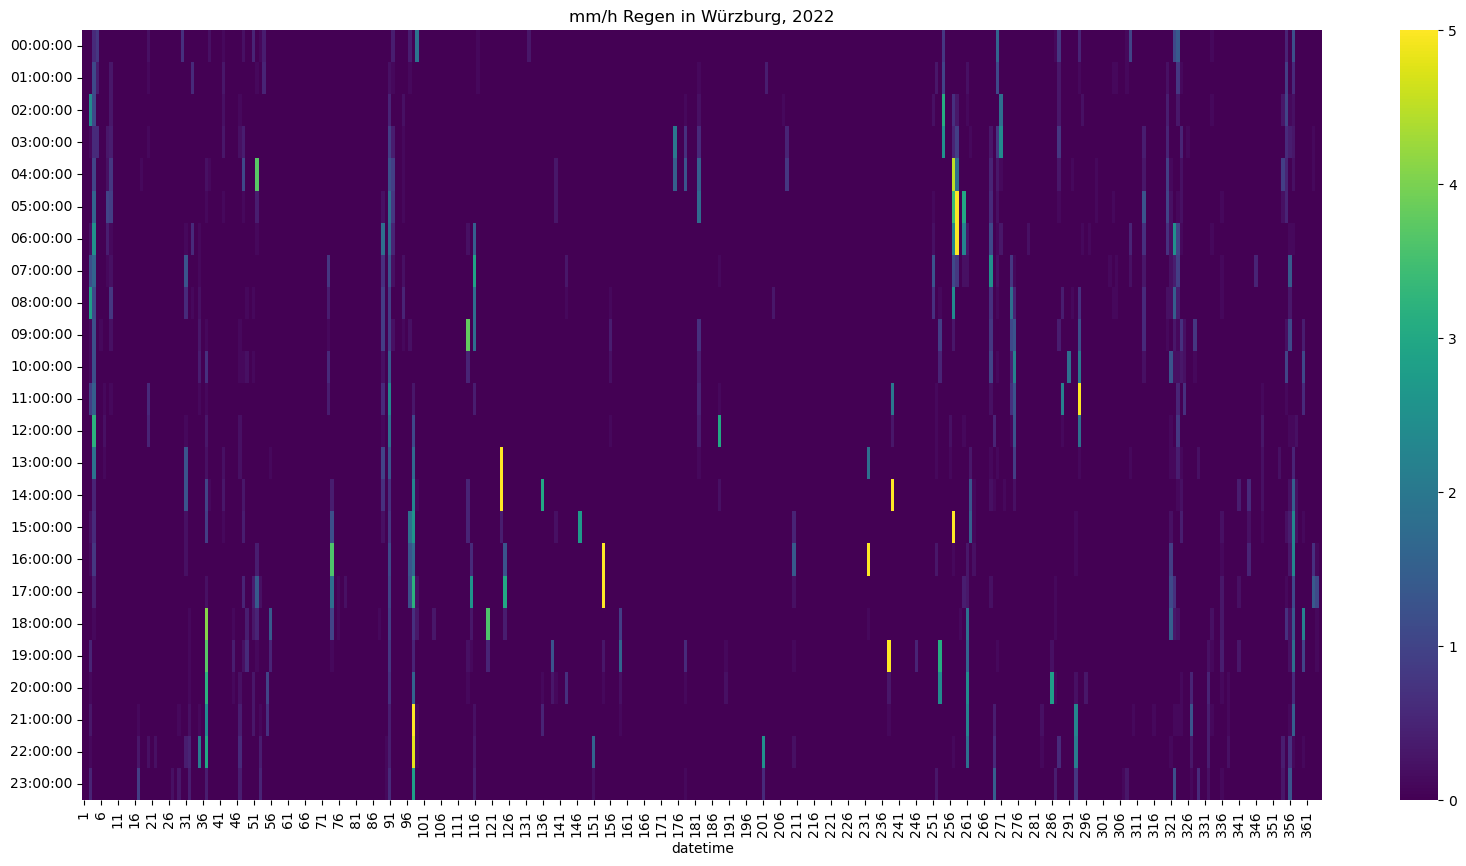

In [14]:
sns.heatmap(rain2022, annot=False, cmap='viridis', vmax=5)
plt.title('mm/h Regen in Würzburg, 2022')
plt.show()

In [15]:
df4 = df2[(df2.index.year >= 2010)].resample('M').sum()
df4

precipitation
datetime                 
2010-01-31           35.9
2010-02-28           28.5
2010-03-31           29.7
2010-04-30           23.7
2010-05-31           68.4
...                   ...
2023-06-30           21.3
2023-07-31           54.2
2023-08-31           69.9
2023-09-30           18.6
2023-10-31           52.7

[166 rows x 1 columns]

In [16]:
import calendar
df4['Year'] = df4.index.year
df4['Month'] = df4.index.month
df4['Month'] = df4['Month'].apply(lambda x: calendar.month_abbr[x])
df4

precipitation  Year Month
datetime                             
2010-01-31           35.9  2010   Jan
2010-02-28           28.5  2010   Feb
2010-03-31           29.7  2010   Mar
2010-04-30           23.7  2010   Apr
2010-05-31           68.4  2010   May
...                   ...   ...   ...
2023-06-30           21.3  2023   Jun
2023-07-31           54.2  2023   Jul
2023-08-31           69.9  2023   Aug
2023-09-30           18.6  2023   Sep
2023-10-31           52.7  2023   Oct

[166 rows x 3 columns]

In [17]:
df4 = df4.set_index(['Year', 'Month'])
df4

precipitation
Year Month               
2010 Jan             35.9
     Feb             28.5
     Mar             29.7
     Apr             23.7
     May             68.4
...                   ...
2023 Jun             21.3
     Jul             54.2
     Aug             69.9
     Sep             18.6
     Oct             52.7

[166 rows x 1 columns]

In [18]:
df_precipitation = df4.reset_index().pivot_table(columns='Year',index='Month',values='precipitation', sort=False)
df_precipitation

Year    2010   2011  2012   2013  2014  2015  2016   2017  2018  2019   2020  \
Month                                                                          
Jan     35.9   38.6  66.6   29.8  31.1  53.3  62.2   14.7  56.1  37.2   23.2   
Feb     28.5   31.4  12.2   35.1  39.6   8.4  60.1   21.2  12.4  10.6  106.5   
Mar     29.7    6.2   5.7   26.1   7.7  43.3  36.5   41.6  46.0  44.8   27.0   
Apr     23.7   14.2  11.8   42.1  40.7  17.3  49.6   20.9  34.5  27.8   10.9   
May     68.4    6.6  34.7   99.7  73.7  22.4  66.9  118.4  48.4  72.0   41.2   
Jun     21.5  110.0  67.2   44.7  16.7  39.3  53.4   49.3  27.3  44.6   75.6   
Jul     75.2   94.6  66.8   36.3  77.5  26.7  47.5   85.0  54.4  25.3   15.5   
Aug    185.1   43.4  28.0  108.9  95.1  67.6  30.6   61.1  22.5  39.2   61.9   
Sep     55.3   28.3  44.8   88.9  31.2  26.2  32.5   68.3  24.1  31.2   31.9   
Oct     27.6   36.1  41.9   56.5  39.2  28.5  38.1   36.1   8.8  65.9   41.6   
Nov     87.0    0.6  79.7   60.2  35.3  87.8  66.0   62.4  11.4  37.2    9.6   
Dec    106.5  109.5  78.5   30.2  41.3  27.6   7.4   49.9  86.2  54.2   48.3   

Year    2021   2022  2023  
Month                      
Jan     54.6   50.7  41.8  
Feb     48.6   51.0  20.5  
Mar     35.8   18.4  72.5  
Apr     17.6   87.8  49.3  
May     69.8   28.9  21.9  
Jun    100.9   23.2  21.3  
Jul    138.7   17.5  54.2  
Aug     82.0   40.2  69.9  
Sep      6.0  109.1  18.6  
Oct     42.5   43.9  52.7  
Nov     26.3   43.7   NaN  
Dec     60.5   46.9   NaN

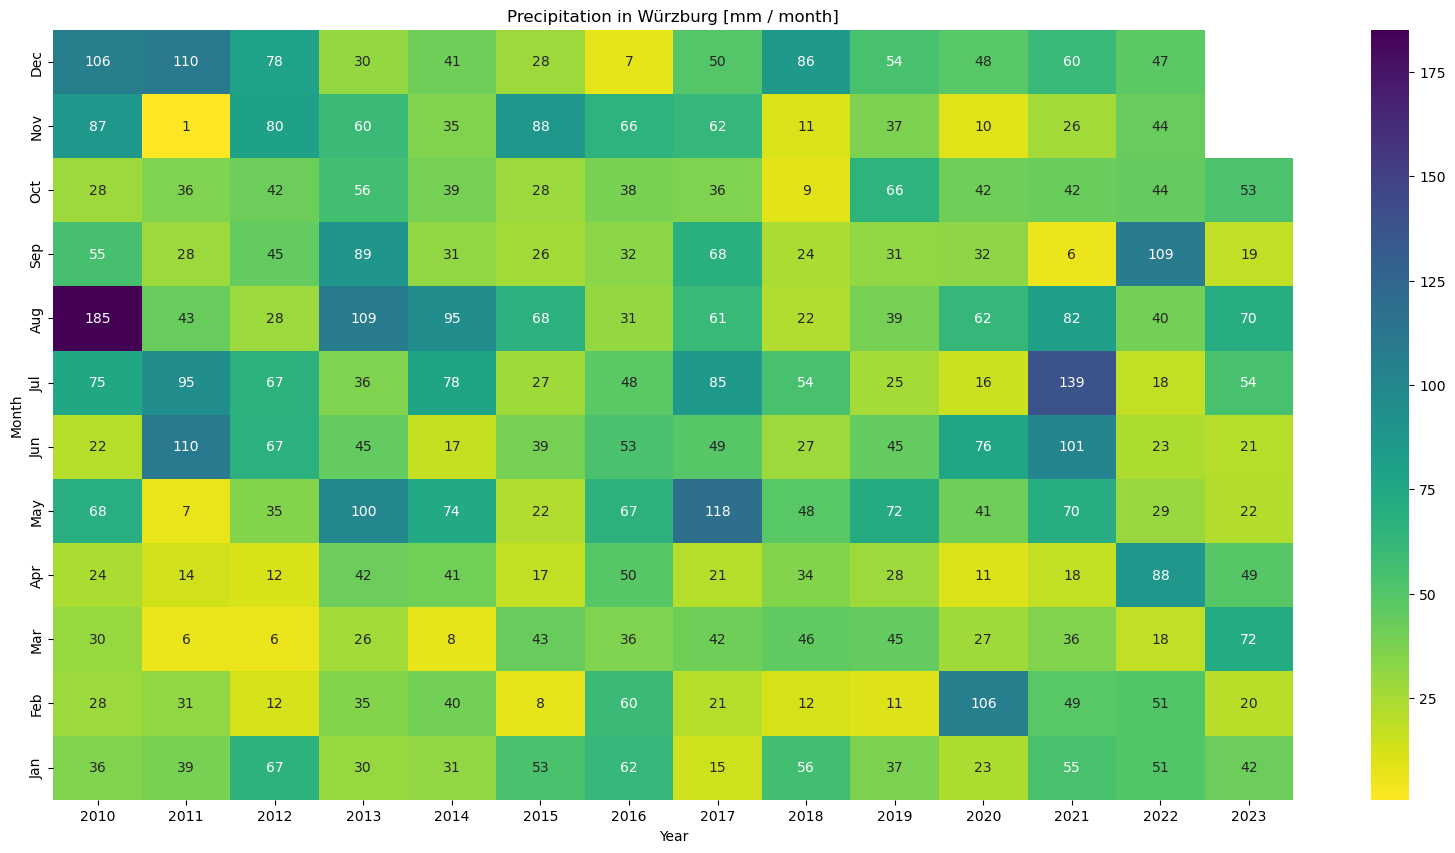

In [24]:
ax=sns.heatmap(df_precipitation, cmap='viridis_r', annot=True, fmt=".0f")
ax.invert_yaxis()
plt.title("Precipitation in Würzburg [mm / month]");
plt.savefig('wurzburg_monthly_precipitations.png', facecolor='w', bbox_inches='tight')

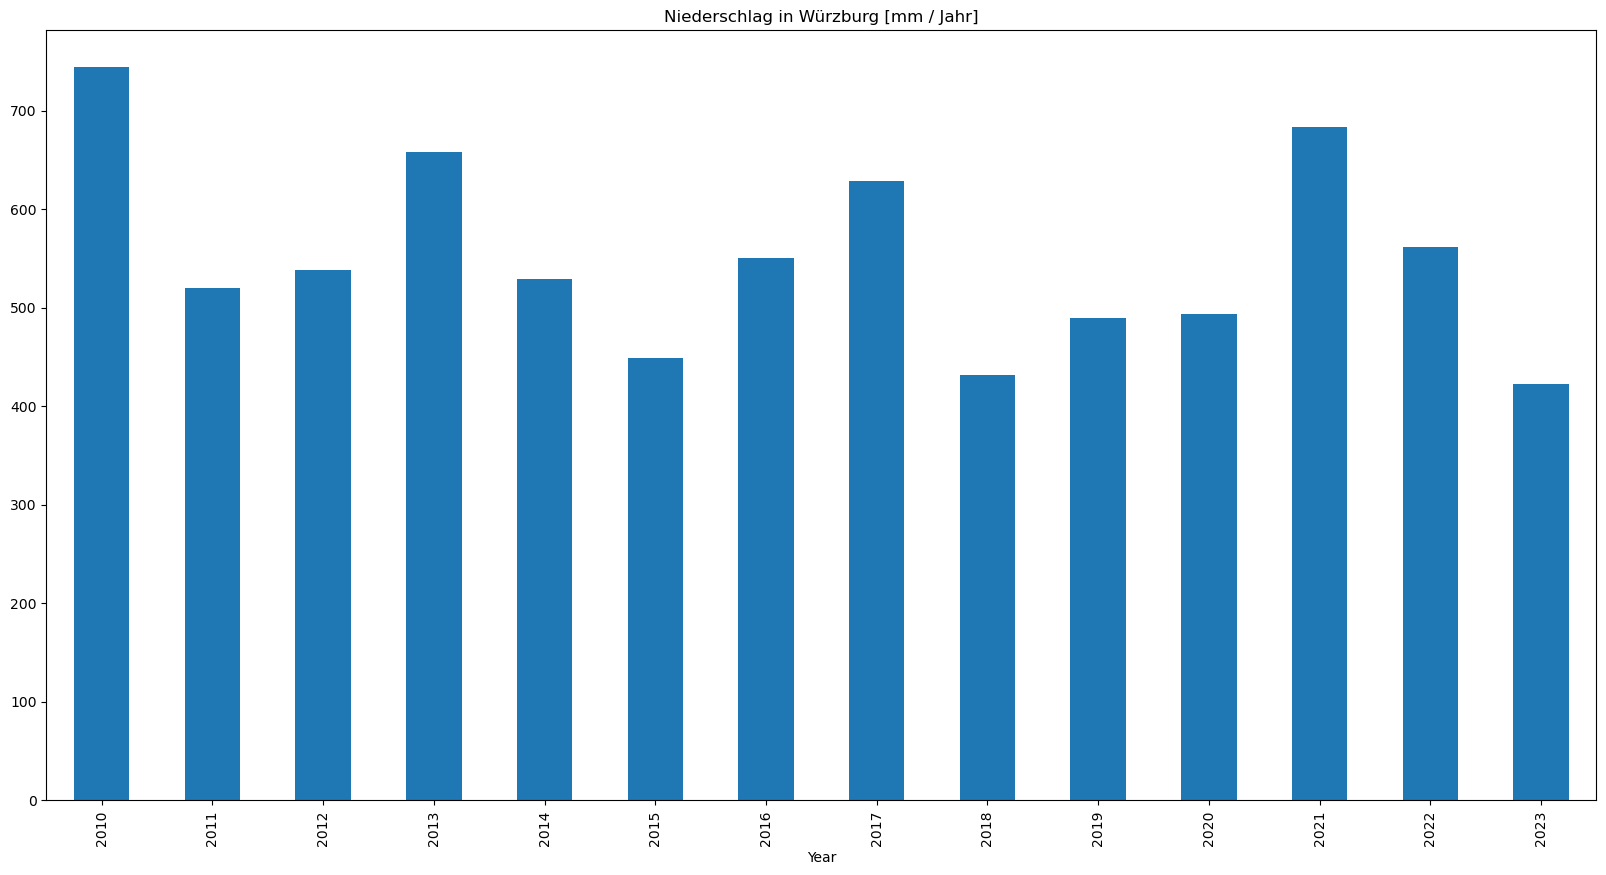

In [20]:
df_precipitation.sum().plot.bar(title='Niederschlag in Würzburg [mm / Jahr]', ylim=(0, None));

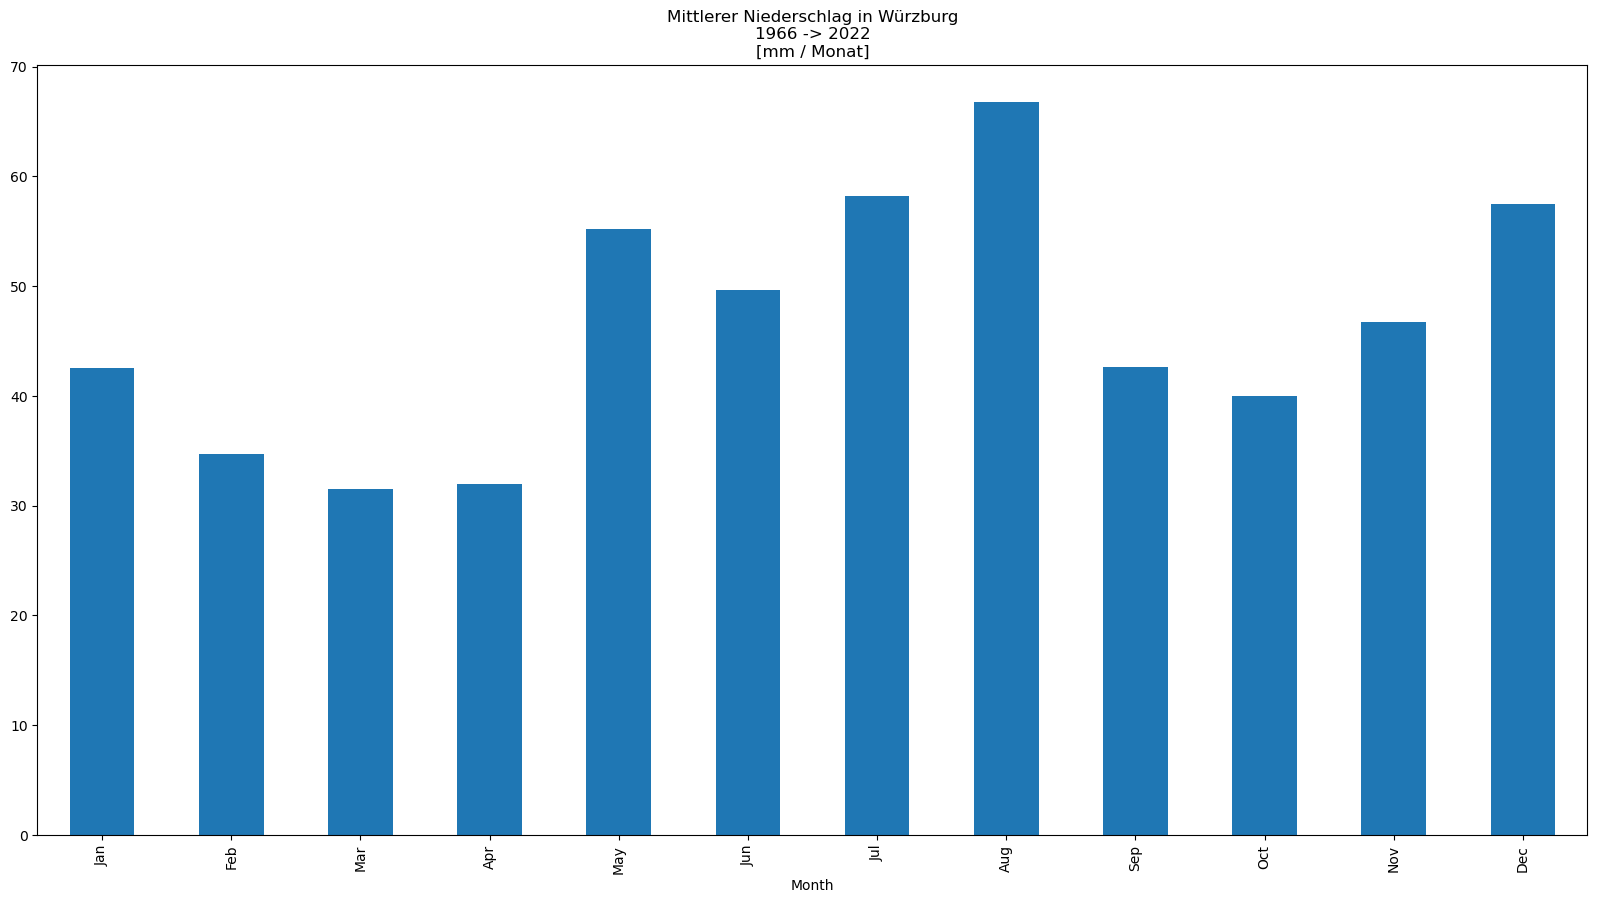

In [21]:
df_precipitation.mean(axis=1).plot.bar(title='Mittlerer Niederschlag in Würzburg\n1966 -> 2022\n[mm / Monat]',
                                       ylim=(0, None));

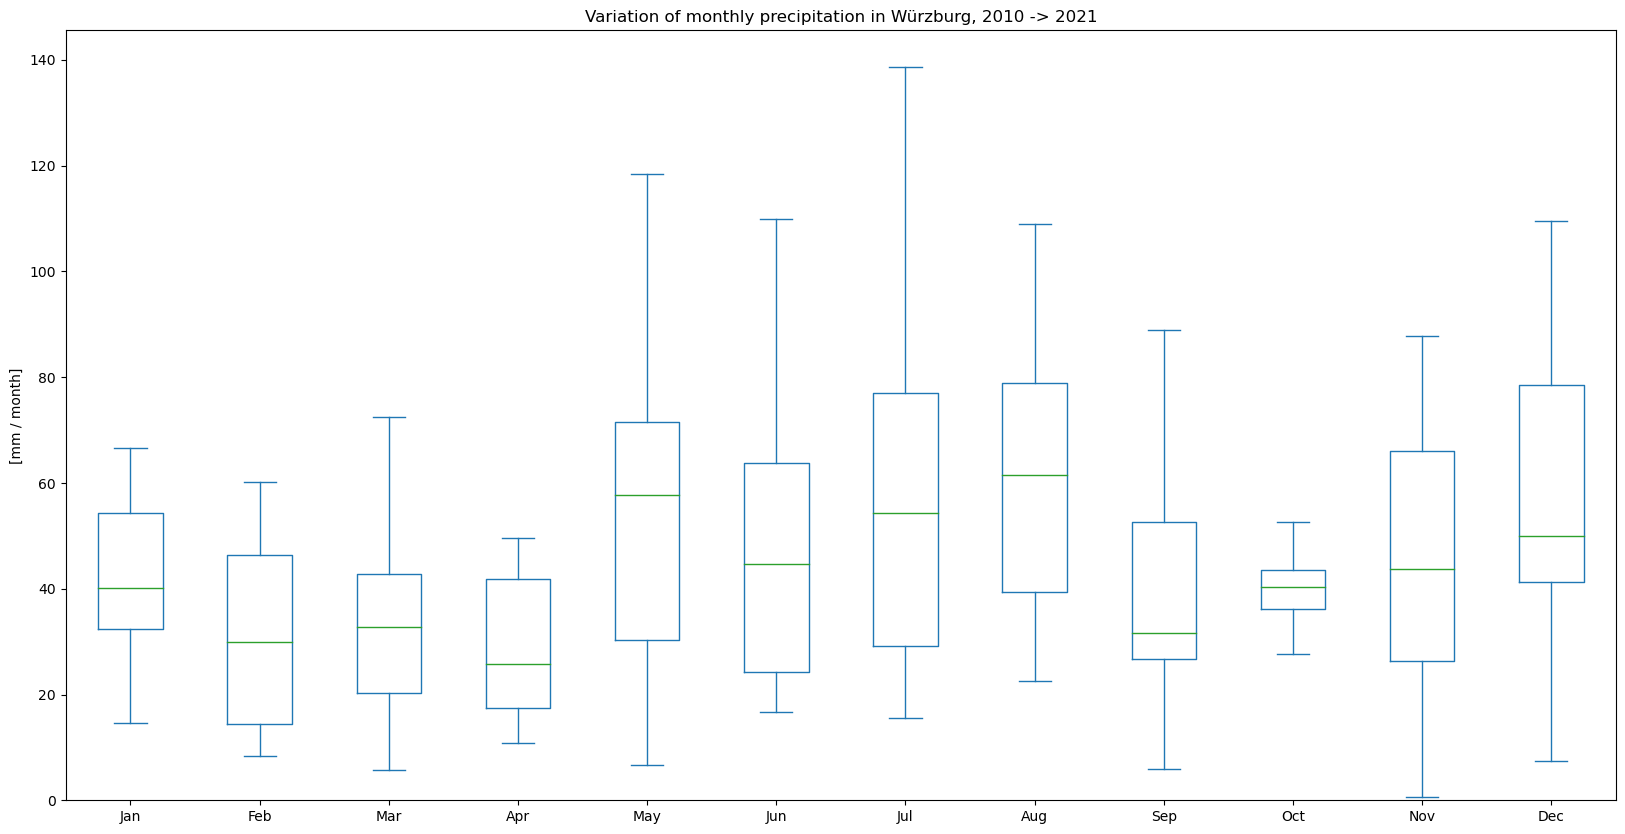

In [22]:
df_precipitation.transpose().plot.box(showfliers=False, ylim=(0, None))
duration = "2010 -> 2022"
plt.title(f"Variation of monthly precipitation in Würzburg, {duration}")
plt.ylabel("[mm / month]");
plt.savefig('monthly_precipitation_variation_wuerzburg.png', facecolor="w", bbox_inches = 'tight')

In [23]:
# TODO: Compare 1995 -> 2021 with 2015 -> 2021
# TODO: Get duration from min max index
# TODO: Ridgeline for each month?
# TODO: apply to Feuerbach
# TODO: Push and document
# TODO: Show on map